In [9]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import sys

# path to pyrosim or if it is already installed you can omit this
sys.path.insert( 0, "/Users/collin/Documents/Code/pyrosim/")
import pyrosim

import pickle
import scipy.stats

# sys.path.insert( 0, "/Users/collin/Documents/Research/2018_Modularity_Trees" )
# Change to wherever the following packages are defined
import configtools
import environments
import drawfuncs
import evolver
import genome
import treenome
import runner



ModuleNotFoundError: No module named 'configtools'

In [7]:
# init data structures

directory = './data/eall/'
# directory = './data/2018-10-29_zipped/eall/'
# directory = './data/2018-10-29_zipped/eedges/'
filenames = os.listdir( directory )

# mutation_options = [ 'all' ]
# mutation_options = [ 'joints' ]
mutation_options = [ 'weights', 'joints', 'topology', 'all' ]
cost_options = [ 'none', 'cc', 'jc', 'all' ]

cost_labels = { 'none': 'none',
                'cc'  : 'CC',
                'jc'  : 'JC',
                'all' : 'CC+JC'
              }

env_options = [ 'eall', 'eedges' ]
eeall_envs = ['00aa', '00ab', '00ba', '00bb',
        '01aa', '01ab', '01ba', '01bb',
        '10aa', '10ab', '10ba', '10bb',
        '11aa', '11ab', '11ba', '11bb']
# print( filenames )

In [8]:
data = {}

config = 0
gens = 0

for mut in mutation_options:
    data[mut] = {}
    for cost in cost_options:
        data[mut][cost] = {}
        data[mut][cost]['adj_matrix'] = []
        data[mut][cost]['weight_expression'] = []
        data[mut][cost]['joint_ranges'] = []
        data[mut][cost]['config'] = 0
        data[mut][cost]['env_fitness'] = []

# read in data
for count, filename in enumerate( filenames ):
    
    if ( filename[-7:] != '.pickle' ):
        continue
    string_to_split = filename[:-7]

    mut, cost, envs, seed, gens = string_to_split.split( '-' )
    
    if ( mut not in mutation_options or envs not in env_options ):
        continue
        
    with open( directory + filename, 'rb' ) as f:
        file_data = pickle.load( f )

        genome = file_data['best'].genome
        data[mut][cost][int( seed ) ] = genome
        data[mut][cost]['adj_matrix'].append( genome.adj_matrix )
        data[mut][cost]['weight_expression'].append( genome.weight_expression )
        data[mut][cost]['joint_ranges'].append( genome.joint_ranges )
        data[mut][cost]['config'] = file_data['config']

        env_fitness_array = [];
        for g in file_data['best_genomes']:
            env_fitness_array.append( g.genome.env_fitness )
        # print( len( env_fitness_array ) )
        data[mut][cost]['env_fitness'].append( env_fitness_array )

    sys.stdout.write( str( count + 1 ) + "/" + str( len( filenames ) ) + " files read\r" )
    sys.stdout.flush()
    # print( genome.env_fitness )


# numpyify
data_options = [];
print( 'aseoath' )
for mut in mutation_options:
#     print( mut )
    for cost in cost_options:
        data[mut][cost]['adj_matrix']          = np.array( data[mut][cost]['adj_matrix'] )
        data[mut][cost]['weight_expression']   = np.array( data[mut][cost]['weight_expression'] )
        data[mut][cost]['joint_ranges']        = np.array( data[mut][cost]['joint_ranges'] )
#         for grr in data[mut][cost]['env_fitness']:
#             print( len( grr ) )
        data[mut][cost]['env_fitness']         = np.array( data[mut][cost]['env_fitness'] )
        samples = np.shape( data[mut][cost]['joint_ranges'] )[0]

        gens = ''

        print( mut, cost, np.shape( data[mut][cost]['env_fitness'] ) )
            
        if ( samples > 0 ):
            data_options.append( ( mut, cost ) )
            print( np.shape( data[mut][cost] ) )
            gens = str( np.shape( data[mut][cost]['env_fitness'] )[1] )
        # gens = np.shape( data[mut][cost]['env_fitness'] )[1]
        print( 'Total (' + mut + ', ' + cost + ') samples: ',
               samples, gens )
# print( data )

ModuleNotFoundError: No module named 'evolver'

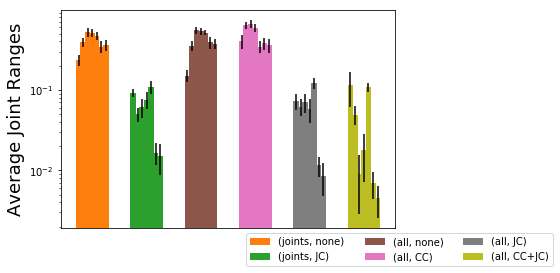

In [19]:
# plot joint ranges
N_JOINTS = 7
x_pos = np.arange( N_JOINTS ) * 2
bar_width = 0.2
tick_labels = ['Root', 'L1', 'L2L', 'L2R', 'R1', 'R2L', 'R2R']

fig = plt.subplots()
count = 0
for i,  ( mut, cost ) in enumerate( data_options ):
    # print( i, mut, cost )
    if mut == 'weights' or mut == 'topology':
        continue
        
    avg_joint_ranges = np.average( data[mut][cost]['joint_ranges'], axis=0 )
    sem_joint_ranges = scipy.stats.sem( data[mut][cost]['joint_ranges'], axis=0 )
    xpts = np.linspace( 0, 1, num = N_JOINTS )
    plt.bar( xpts + count * 2,
             avg_joint_ranges, bar_width,
             yerr=sem_joint_ranges,
             label='(' + mut + ', ' + cost_labels[cost] + ')', color = 'C' + str(i) )
    count += 1
    

plt.xticks( [] )
plt.gca().set_yscale('log')
# plt.xticks( x_pos + 1.5 * bar_width, tick_labels )
plt.legend( ncol = 3, bbox_to_anchor = (0.54, 0) )
plt.ylabel( 'Average Joint Ranges', fontsize = 18 )
plt.show()

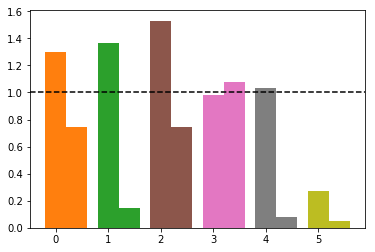

In [20]:
xpts = np.linspace( 0, 1, num = N_JOINTS )
count = 0
# calculate average ratio of leaf joint range to parent
for i, ( mut, cost ) in enumerate( data_options ):
    if mut == 'weights' or mut == 'topology':
        continue
        
    joint_ranges = data[mut][cost]['joint_ranges']
    avg_joint_ranges = np.average( joint_ranges, axis = 0 )

    right_ratio = ( avg_joint_ranges[5] + avg_joint_ranges[6] ) / ( 2 * avg_joint_ranges[4] )
    left_ratio = ( avg_joint_ranges[2] + avg_joint_ranges[3] ) / ( 2 * avg_joint_ranges[1] )
    plt.bar( [count, count + 0.4], [left_ratio, right_ratio], width = .4, color = 'C' + str(i) )
    count += 1
    # print( mut, cost, left_ratio, right_ratio )
plt.axhline( 1, color = 'k', ls = '--' )
plt.show()  

weights none 0.8178232758620689 0.0028297008713461104
joints none 0.872875 0.006085330722319041
joints jc 0.8521875000000001 0.0064241885857314876
topology none 0.8621354166666664 0.00530833768935114
topology cc 0.786 0.007479728951424751
all none 0.9019504310344829 0.00526201780589998
all cc 0.8525446428571432 0.01233209941657981
all jc 0.8811538461538462 0.009442334619262874
all all 0.8059250000000001 0.011567629492827535


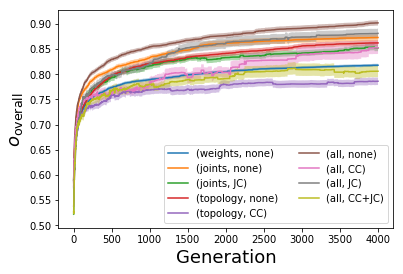

In [21]:
# plot average fitness
pop_size = 100
# evals_per_gen = pop_size * len( envs )
# evaluations = np.arange( 0, evals_per_gen * gens, evals_per_gen )
for mut, cost in data_options:
    gens = np.shape( data[mut][cost]['env_fitness'] )[1]
    
    evaluations = np.arange( 0, gens )
    indv_fitness = np.average( data[mut][cost]['env_fitness'], axis=2 )

    sem_fitness = scipy.stats.sem( indv_fitness, axis=0 )
    average_fitness = np.average( indv_fitness, axis=0 )
    print( mut, cost, average_fitness[3999], sem_fitness[3999])
    plt.plot( evaluations[:4000], average_fitness[:4000], label='(' + mut + ', ' + cost_labels[cost] + ')' )
    plt.fill_between( evaluations[:4000], average_fitness[:4000] + sem_fitness[:4000],
                      average_fitness[:4000] -  sem_fitness[:4000], alpha=0.4)


plt.legend( ncol = 2 )
# plt.title( 'Avg. Max Perfo', fontsize = 22 )
plt.xlabel( 'Generation', fontsize = 18 )
plt.ylabel( r'$o_{\rm overall}$', fontsize = 18 )
plt.savefig( 'img/eall-avg-fitness.png', dpi=400 )
plt.show()

weights none 0.8203125 0.011567629492827535
joints none 0.8668750000000001 0.011567629492827535
joints jc 0.844375 0.011567629492827535
topology none 0.86078125 0.011567629492827535
topology cc 0.7892187500000001 0.011567629492827535
all none 0.895 0.011567629492827535
all cc 0.8625 0.011567629492827535
all jc 0.874375 0.011567629492827535
all all 0.8115625 0.011567629492827535


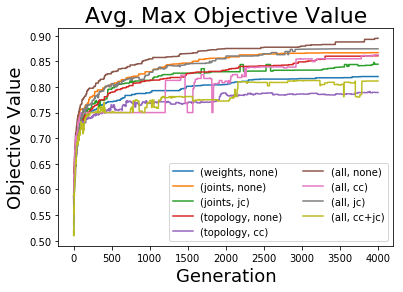

In [6]:
# plot median fitness
pop_size = 100
# evals_per_gen = pop_size * len( envs )
# evaluations = np.arange( 0, evals_per_gen * gens, evals_per_gen )
for mut, cost in data_options:
    gens = np.shape( data[mut][cost]['env_fitness'] )[1]
    
    evaluations = np.arange( 0, gens )
    indv_fitness = np.average( data[mut][cost]['env_fitness'], axis=2 )

    # sem_fitness = scipy.stats.sem( indv_fitness, axis=0 )
    # average_fitness = np.average( indv_fitness, axis=0 )
    median_fitness = np.median( indv_fitness, axis = 0 )
    print( mut, cost, median_fitness[3999], sem_fitness[3999])
    plt.plot( evaluations[:4000], median_fitness[:4000], label='(' + mut + ', ' + cost_labels[cost] + ')' )
#     plt.fill_between( evaluations[:4000], average_fitness[:4000] + sem_fitness[:4000],
#                       average_fitness[:4000] -  sem_fitness[:4000], alpha=0.4)


plt.legend( ncol = 2 )
plt.title( 'Avg. Max Objective Value', fontsize = 22 )
plt.xlabel( 'Generation', fontsize = 18 )
plt.ylabel( 'Objective Value', fontsize = 18 )
plt.savefig( 'img/eall-median-fitness.png', dpi=400 )
plt.show()

p values
test1 80.5 1.1176468546994863e-07
test2 195.0 0.048551198499240666


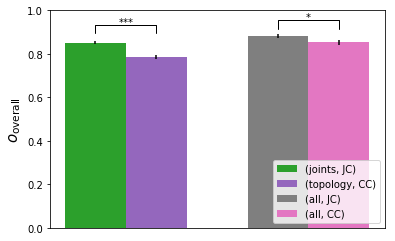

In [22]:
# plot average fitness at last generation of cost functions

count = 0


joints_jc = np.average( data['joints']['jc']['env_fitness'][:, -1, :], axis = 1 )
topology_cc = np.average( data['topology']['cc']['env_fitness'][:, -1, :], axis = 1 )
all_jc = np.average( data['all']['jc']['env_fitness'][:, -1, :], axis = 1 )
all_cc = np.average( data['all']['cc']['env_fitness'][:, -1, :], axis = 1 )

plt.bar( 0, np.average( joints_jc ), label = '(joints, JC)',
         width = 1.0, color = 'C2',
         yerr = scipy.stats.sem( joints_jc ) )
plt.bar( 1, np.average( topology_cc ), label = '(topology, CC)',
         width = 1.0, color = 'C4',
         yerr = scipy.stats.sem( topology_cc ) )
plt.bar( 3, np.average( all_jc ), label = '(all, JC)',
         width = 1.0, color = 'C7',
         yerr = scipy.stats.sem( all_jc ) )
plt.bar( 4, np.average( all_cc ), label = '(all, CC)',
         width = 1.0, color = 'C6',
         yerr = scipy.stats.sem( all_cc ) )
    
plt.xticks( [], [] )
plt.ylim( 0, 1 )
plt.legend( loc = 'lower right')

plt.annotate( '', xy = ( 0, 0.85 ), xytext = ( 1, 0.85 ),
             arrowprops = { 'connectionstyle': 'bar',
                            'arrowstyle' : '-',
                            'shrinkA' : 10, 'shrinkB' : 10 } )
plt.text( 0.5, 0.93, '***', ha = 'center' )
plt.annotate( '', xy = ( 3, 0.87 ), xytext = ( 4, 0.87 ),
             arrowprops = { 'connectionstyle': 'bar',
                            'arrowstyle' : '-',
                            'shrinkA' : 10, 'shrinkB' : 10 } )
plt.text( 3.5, 0.955, '*', ha = 'center' )
print( 'p values' )
plt.ylabel( r'$o_{\rm overall}$', fontsize = 15 )
# plt.title( 'Average Maximum Performance', fontsize = 18 )
# test 1
u1, p1 = scipy.stats.mannwhitneyu( joints_jc, topology_cc )

# test 2
u2, p2 = scipy.stats.mannwhitneyu( all_jc, all_cc )

print( 'test1', u1, p1 )
print( 'test2', u2, p2 )
plt.savefig( 'img/eall-jc-vs-cc.png', dpi = 400 )
# plt.show()

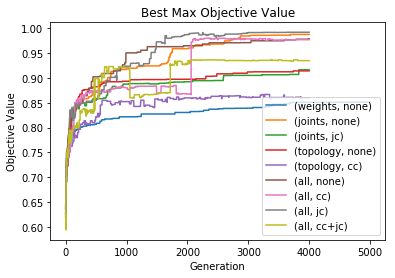

In [9]:
# plot maximum fitness

for mut, cost in data_options:
    gens = np.shape( data[mut][cost]['env_fitness'] )[1]

    evaluations = np.arange( 0, gens )
    indv_fitness = np.average( data[mut][cost]['env_fitness'], axis=2 )

    # sem_fitness = scipy.stats.sem( indv_fitness, axis=0 )
    max_fitness = np.max( indv_fitness, axis=0 )
    plt.plot( evaluations, max_fitness, label='(' + mut + ', ' + cost_labels[cost] + ')' )
    # plt.fill_between( evaluations, average_fitness + sem_fitness, average_fitness - sem_fitness, alpha=0.4)


plt.legend()
plt.title( 'Best Max Objective Value' )
plt.xlabel( 'Generation' )
plt.ylabel( 'Objective Value' )
plt.savefig( 'img/eall-max-fitness.png', dpi=400 )
plt.show()

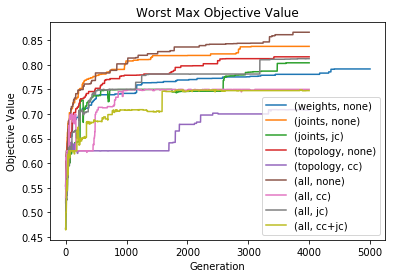

In [81]:
# plot minimum fitness

for mut, cost in data_options:
    gens = np.shape( data[mut][cost]['env_fitness'] )[1]

    evaluations = np.arange( 0, gens )
    indv_fitness = np.average( data[mut][cost]['env_fitness'], axis=2 )

    # sem_fitness = scipy.stats.sem( indv_fitness, axis=0 )
    min_fitness = np.min( indv_fitness, axis=0 )
    plt.plot( evaluations, min_fitness, label='(' + mut + ', ' + cost_labels[cost] + ')' )
    # plt.fill_between( evaluations, average_fitness + sem_fitness, average_fitness - sem_fitness, alpha=0.4)


plt.legend()
plt.title( 'Worst Max Objective Value' )
plt.xlabel( 'Generation' )
plt.ylabel( 'Objective Value' )
plt.savefig( 'img/eall-min-fitness.png', dpi=400 )
plt.show()

weights none 0.5320689655172414 0.014372158621260988
joints none 0.6629999999999999 0.018616748731541
joints jc 0.5746296296296297 0.01786488925877634
topology none 0.6285000000000002 0.016683583368778676
topology cc 0.48916666666666664 0.0175448249129495
all none 0.7381034482758619 0.013848257953396462
all cc 0.6390476190476191 0.027752346635269827
all jc 0.6567307692307692 0.026992794348595372
all all 0.5677999999999999 0.02059142216231474


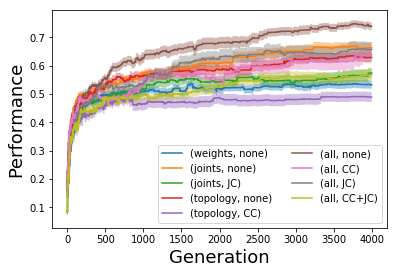

In [23]:
# plot average minimum env. preformance trajectories

for i, (mut, cost) in enumerate( data_options ):
    gens = np.shape( data[mut][cost]['env_fitness'] )[1]

    evaluations = np.arange( 0, gens )
    indv_fitness = np.min( data[mut][cost]['env_fitness'], axis=2 )

    sem_fitness = scipy.stats.sem( indv_fitness, axis=0 )
    average_fitness = np.average( indv_fitness, axis=0 )
    print( mut, cost, average_fitness[3999], sem_fitness[3999])
    plt.plot( evaluations[:4000], average_fitness[:4000], label='(' + mut + ', ' + cost_labels[cost] + ')' )
    plt.fill_between( evaluations[:4000], average_fitness[:4000] + sem_fitness[:4000],
                      average_fitness[:4000] - sem_fitness[:4000], alpha=0.4)


plt.legend( ncol = 2 )
# plt.title( 'Avg. Min. Environmental Performance', fontsize = 22 )
plt.xlabel( 'Generation', fontsize = 18 )
plt.ylabel( 'Performance', fontsize = 18 )
plt.savefig( 'img/eall-avg-min-env-fitness.png', dpi=400 )

plt.show()

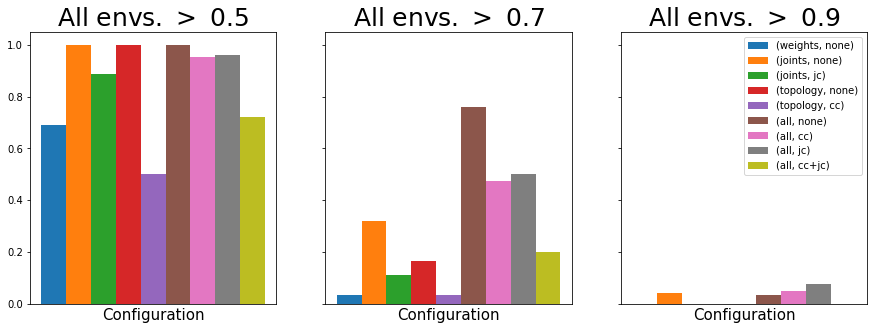

In [4]:
#
# bar chart of proportion of trials which had every environment exceeding 0.7 fitness
thresholds = [ 0.5, 0.7, 0.9 ]
fig, axs = plt.subplots( 1, len( thresholds ), sharex = True, sharey = True, figsize=( 5 * len( thresholds ), 5 ) )
bar_width = 1.0

for i in range( len( thresholds ) ):
#     figures[i] = plt.figure()
    axs[i].set_title( 'All envs. $>$ ' + str ( thresholds[i] ), fontsize = 25 )
    axs[i].set_xticks( [], [] )
    axs[i].set_xlabel( 'Configuration', fontsize = 15 )
for i, ( mut, cost ) in enumerate( data_options ):
    gens = np.shape( data[mut][cost]['env_fitness'] )[1]
    
    sample = 4000 - 1
    
    for j, threshold in enumerate( thresholds ):
        num_above_threshold = np.copy( data[mut][cost]['env_fitness'][:, sample, :] )
    #    print( num_above_threshold )
    #     print( num_above_threshold )
        num_above_threshold[ num_above_threshold >= threshold ] = 1
    #     print( num_above_threshold )
        num_above_threshold[ num_above_threshold < threshold ] = 0
        # print( num_above_threshold )
        num_above_threshold = np.sum( num_above_threshold, axis = 1 )
        # print( num_above_threshold )
        num_above_threshold[ num_above_threshold < 16 ] = 0
        num_above_threshold[ num_above_threshold > 0 ] = 1
        ratio = np.sum( num_above_threshold ) / len( num_above_threshold )
        
        axs[j].bar( i, ratio, bar_width, label='(' + mut + ', ' + cost_labels[cost] + ')')
        if ( j == len( thresholds ) - 1 ):
            axs[j].legend()
plt.savefig( 'img/threshold-bar.png', dpi = 400 )
plt.show()

weights none 0.9 0.0
weights none 0.9500000000000001 0.0
joints none 0.9 4.0
joints none 0.9500000000000001 0.0
joints jc 0.9 0.0
joints jc 0.9500000000000001 0.0
topology none 0.9 0.0
topology none 0.9500000000000001 0.0
topology cc 0.9 0.0
topology cc 0.9500000000000001 0.0
all none 0.9 3.4482758620689653
all none 0.9500000000000001 0.0
all cc 0.9 4.761904761904762
all cc 0.9500000000000001 0.0
all jc 0.9 7.6923076923076925
all jc 0.9500000000000001 3.8461538461538463
all all 0.9 0.0
all all 0.9500000000000001 0.0


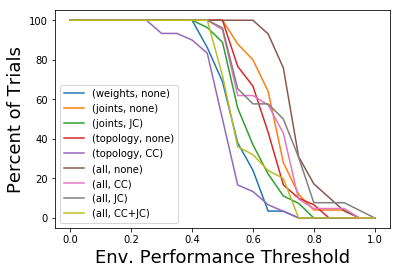

In [23]:
thresholds = np.linspace( 0, 1.0, 21 )

for i, ( mut, cost ) in enumerate( data_options ):
    
    percent = []
    sample = 4000 - 1
    for j, threshold in enumerate( thresholds ):
        num_above_threshold = np.copy( data[mut][cost]['env_fitness'][:, sample, :] )
    #    print( num_above_threshold )
    #     print( num_above_threshold )
        num_above_threshold[ num_above_threshold >= threshold ] = 1
    #     print( num_above_threshold )
        num_above_threshold[ num_above_threshold < threshold ] = 0
        # print( num_above_threshold )
        num_above_threshold = np.sum( num_above_threshold, axis = 1 )
        # print( num_above_threshold )
        num_above_threshold[ num_above_threshold < 16 ] = 0
        num_above_threshold[ num_above_threshold > 0 ] = 1
        p = np.sum( num_above_threshold ) / len( num_above_threshold ) * 100 
        percent.append( p )
        if ( threshold >= 0.9 and threshold < 1.0):
            print( mut, cost, threshold, p )
    plt.plot( thresholds, percent, label='(' + mut + ', ' + cost_labels[cost] + ')')
plt.legend()
plt.ylabel( 'Percent of Trials', fontsize = 18 )
plt.xlabel( 'Env. Performance Threshold', fontsize = 18 )
plt.savefig( 'img/threshold-plot.png', dpi = 400 )
plt.show()

In [5]:
mut_option = 'all'
config = data[ mut_option ][ cost_option ][ 'config' ]

In [10]:
# config = data['all']['config']
mut_option = 'all'
cost_option = 'none'

tree_kwargs = configtools.tree_from_config(config)
sim_kwargs = configtools.sim_from_config(config)
# sim_kwargs['eval_steps'] = sim_kwargs['eval_time']
# sim_kwargs.pop( 'eval_time', None )
envs_kwargs = configtools.envs_from_config(config)

t_base = treenome.Tree( **tree_kwargs )

best_index = 0
max_performance = 0
g = None
for count in range(0, 30):
    if count in data[mut_option][cost_option]:
        g_test = data[mut_option][cost_option][count]

        performance = np.average( g_test.env_fitness)
        if performance > max_performance:
            g = g_test
            max_performance = performance
            env_performance = g_test.env_fitness
            best_index = count
# print( sim_kwargs )

for env in eeall_envs:
    sim = pyrosim.Simulator( play_blind = False, **sim_kwargs, play_paused = False )
            
    sensors = g.send_to_simulator(sim, t_base)
    print( sensors )
    environments.send_to_simulator(sim, env, t_base, **envs_kwargs )
    sim.start()
    x = sim.wait_to_finish()


{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13, 15, 17], 'ray': [0, 3, 8, 11], 'motor': [1, 4, 6, 9, 12, 14, 16]}
{'position': [2, 5, 7, 10, 13,

-1.5707963267948966 0.4
-2.443460952792061 0.7421531742634998
-2.879793265790644 0.8198167671329597
-2.007128639793479 0.6772130010889381
-0.6981317007977318 1.1417307365328273
-1.1344640137963142 0.8079984947155929
-0.26179938779914935 0.7169406275667889


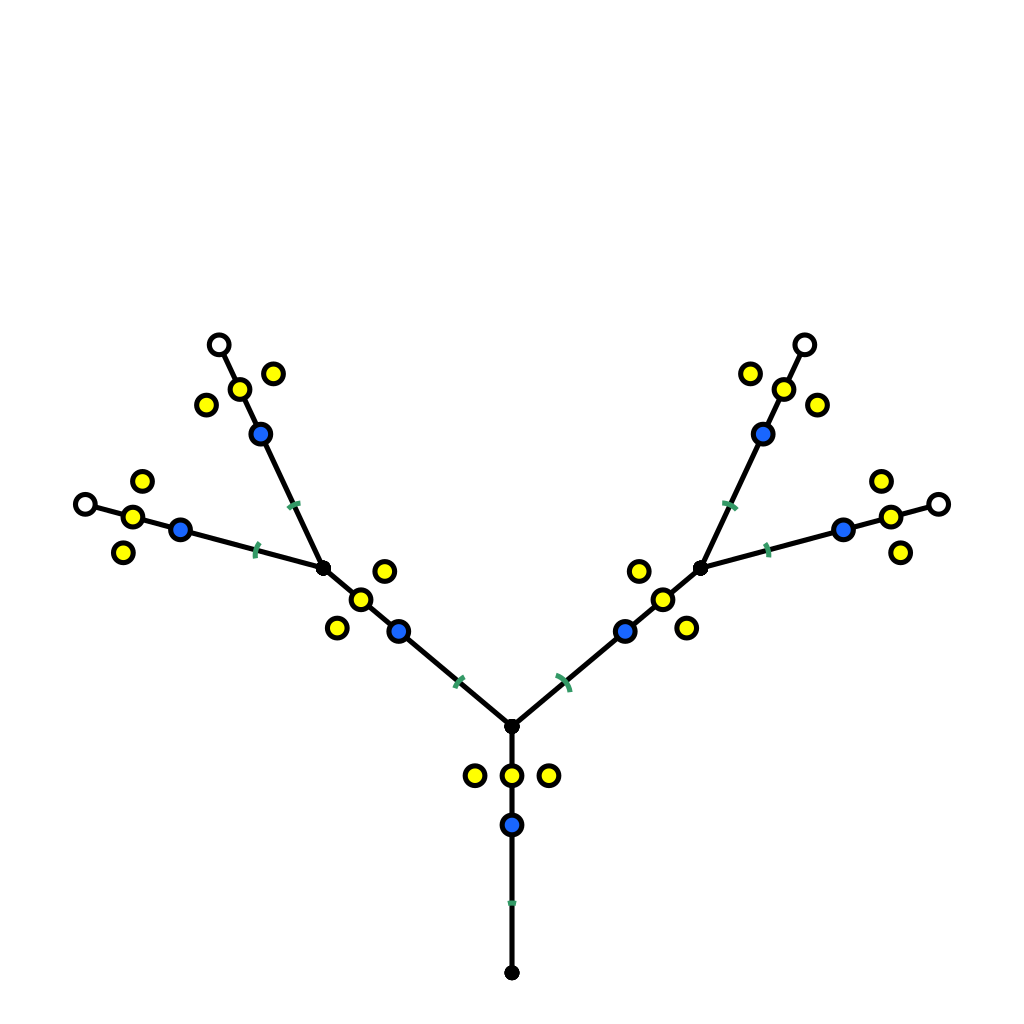

In [26]:
g = data[ mut_option ][ cost_option ][2]

t = drawfuncs.tree_from_config( config )

surface = drawfuncs.draw_tree( g, t, size=(1024, 1024),
                               file_name='img/tree-base.png',
                              draw_branches=True,
                              draw_synapses=False)
from IPython.display import Image
Image( 'img/tree-base.png' )

()


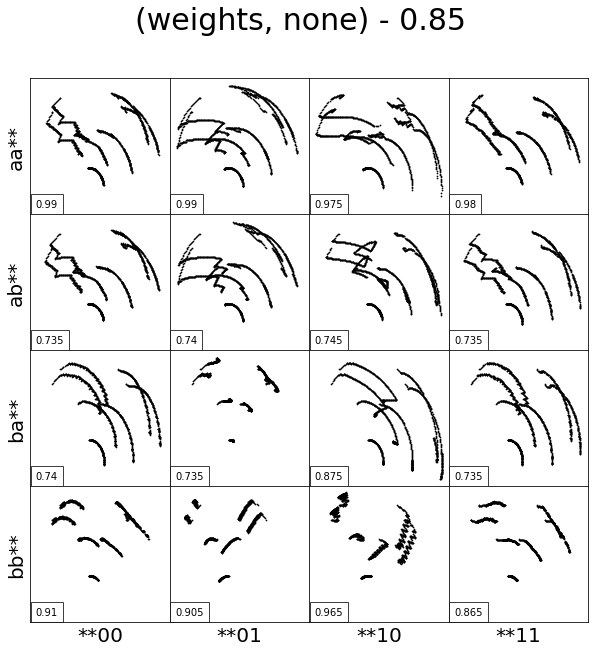

()


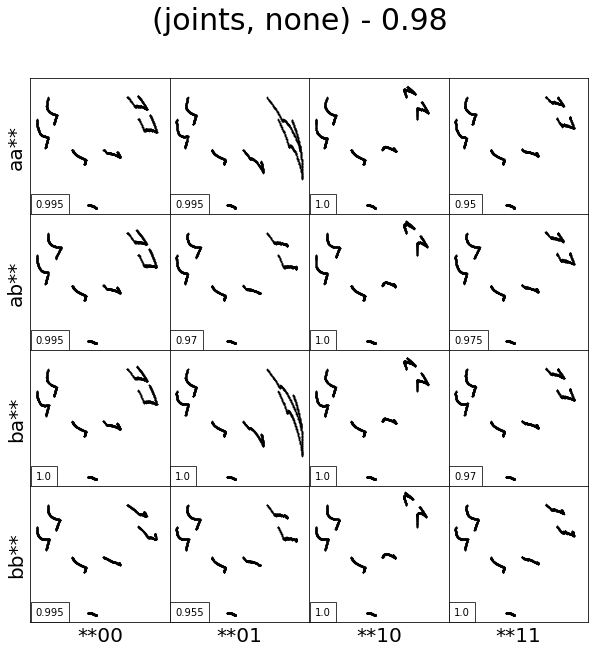

()


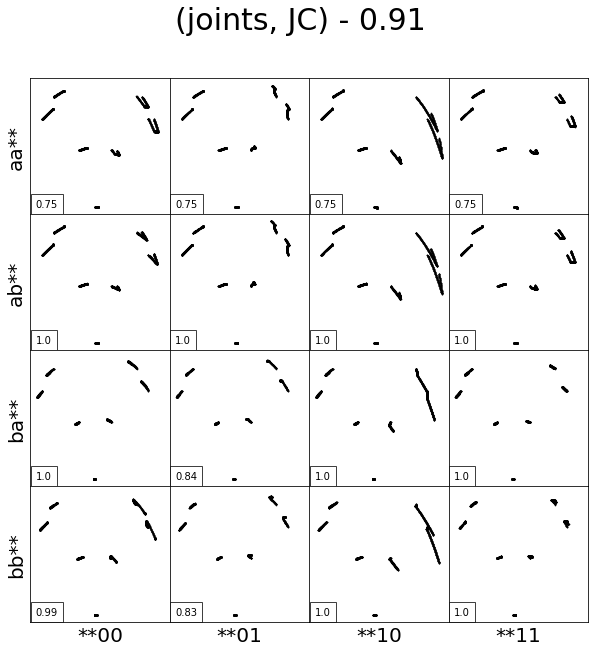

()


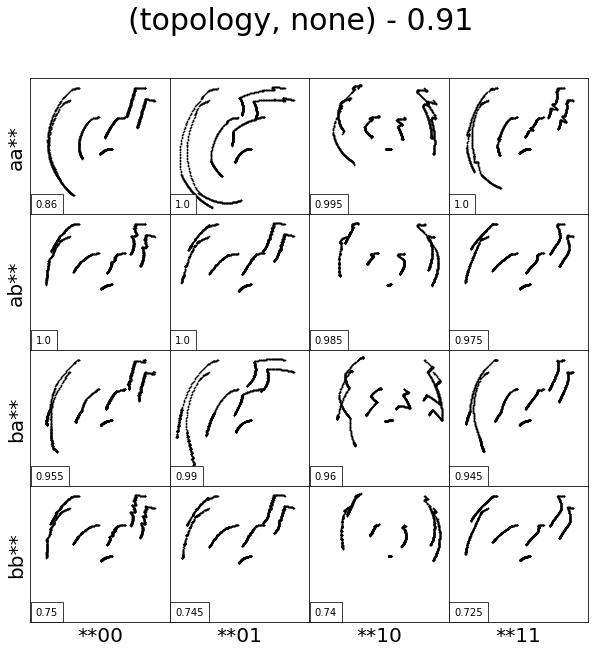

()


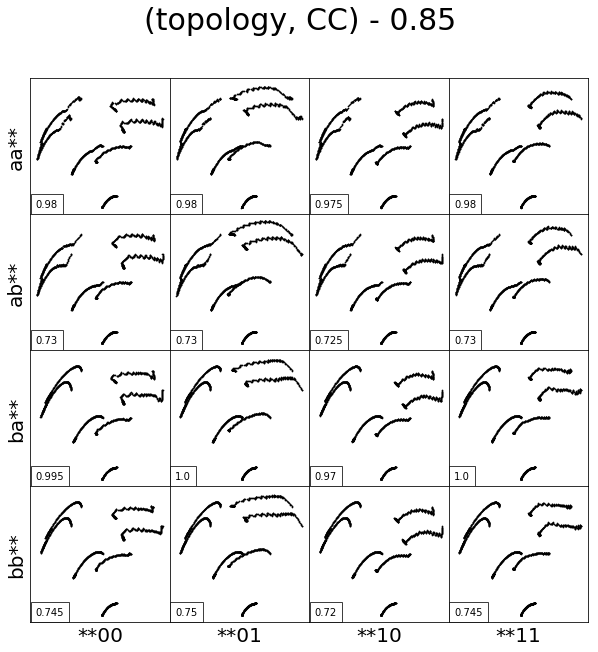

()


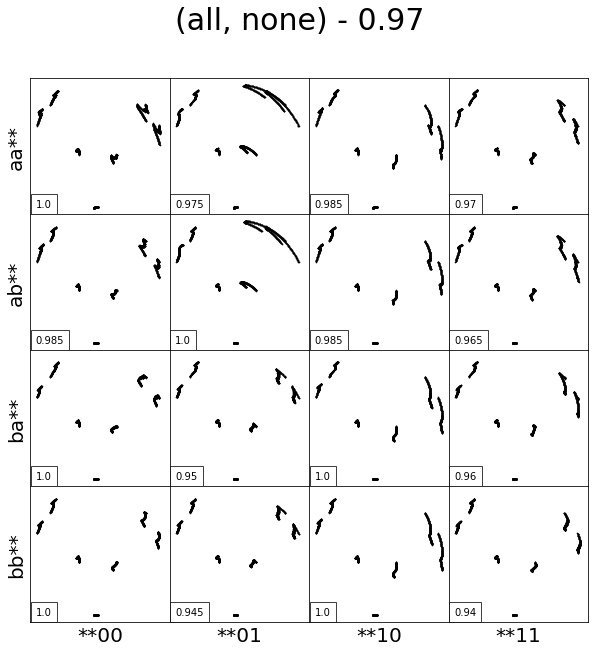

()


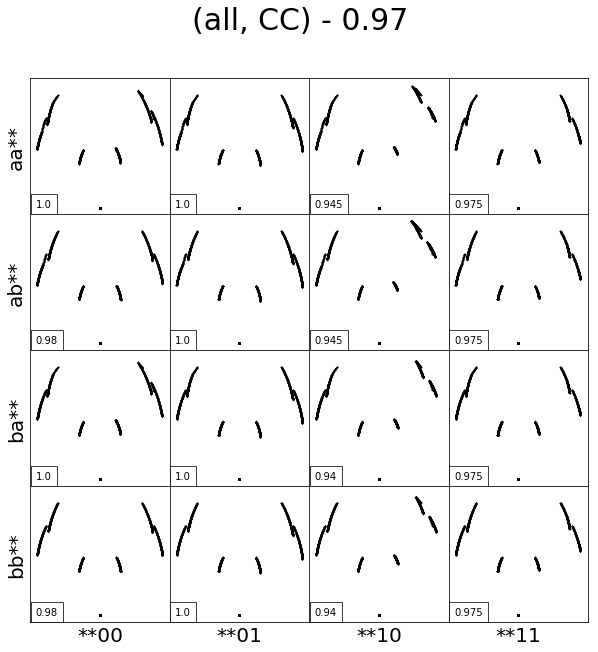

()


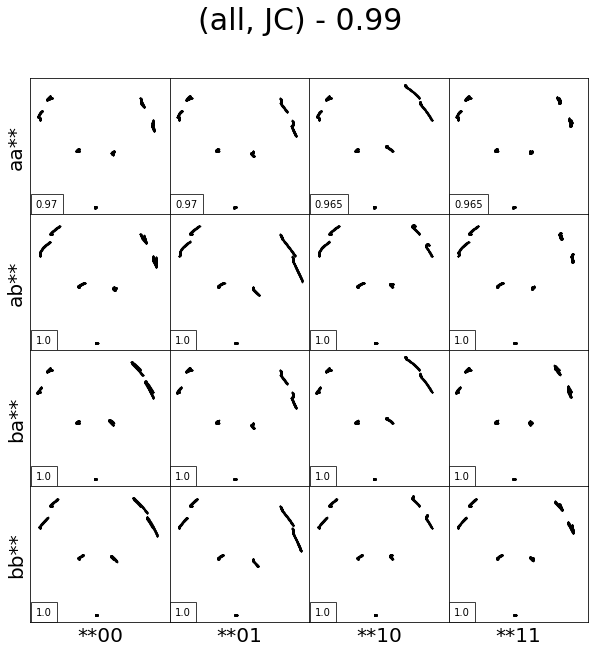

()


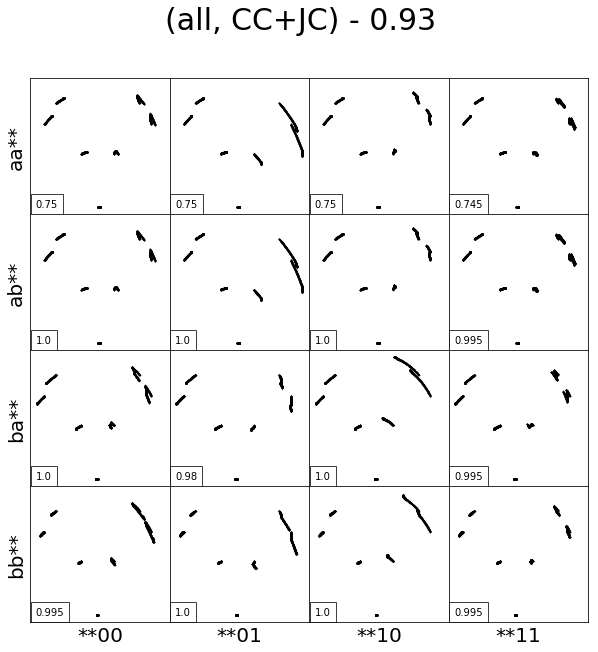

In [27]:
tree_kwargs = configtools.tree_from_config(config)
sim_kwargs = configtools.sim_from_config(config)
envs_kwargs = configtools.envs_from_config(config)

t_base = treenome.Tree( **tree_kwargs )

position_data = []
angle_data = []

for mut_option, cost_option in data_options:
        
        # find max performer
        
        max_performance = 0.0
        g = None
        best_index = 0
        
        for count in range(0, 30):
            if count in data[mut_option][cost_option]:
                g_test = data[mut_option][cost_option][count]
                
                performance = np.average( g_test.env_fitness)
                if performance > max_performance:
                    g = g_test
                    max_performance = performance
                    env_performance = g_test.env_fitness
                    best_index = count
        # print( mut_option, cost_option, max_performance )
#         count = 5
#         found = False
#         while ( not found ):
#             found = True
#             if count in data[mut_option][cost_option]:
#                 g = data[mut_option][cost_option][count]
#             else:
#                 found = False
#                 count += 1
            
        fig, axs = plt.subplots( 4, 4, sharex=True, sharey=True, figsize=( 10, 10 ) )
        # fig2, axs2 = plt.subplots( 4, 4, sharex=True, sharey=True, figsize=( 10, 10 ) )
        # for mut in mutation_options:
        #     for cost in cost_options:
        sims = []
        
        print( np.shape( performance ) )
        for i, env in enumerate( eeall_envs ):
            
            sims.append( pyrosim.Simulator(play_blind=True, **sim_kwargs ) )
            sensors = g.send_to_simulator(sims[i], t_base)
            environments.send_to_simulator(sims[i], env, t_base, **envs_kwargs )
            sims[i].start()

        for i, env in enumerate( eeall_envs ):
            ax = axs[ i // 4, i%4 ]
            
            cmap = matplotlib.cm.get_cmap('plasma')
            rgba = cmap(1.0 - env_performance[i])
            ax.text(0.04, 0.11, str(env_performance[i]), fontsize=10, transform=ax.transAxes,
                    verticalalignment='top',
                    bbox={'facecolor':'white', 'alpha':0.75, 'pad':5})
    
            sims[i].wait_to_finish()
            for sensor_id in sensors['position']:
                x_pos_data = sims[i].get_sensor_data( sensor_id, svi = 0 )
                y_pos_data = sims[i].get_sensor_data( sensor_id, svi = 1 )
                # c = np.zeros( ( len(x_pos_data), 3 ) )
                # c = 'k'
                # ax.scatter( x_pos_data, y_pos_data, s = 0.5, c = rgba)
                ax.scatter( x_pos_data, y_pos_data, s = 0.5, c = 'k')
            # axs[ i // 4, i%4 ].set_aspect( 'equal' )
            # axs[ i // 4, i%4 ].set_title( env, y=0.85)
            ax.set_xticks([])
            ax.set_yticks([])
            
            env_label = env
            env_label = env_label.replace( '0', 'x' )
            env_label = env_label.replace( '1', 'y' )
            env_label = env_label.replace( 'a', '0' )
            env_label = env_label.replace( 'b', '1' )
            env_label = env_label.replace( 'x', 'a' )
            env_label = env_label.replace( 'y', 'b' )
            
            if ax.is_last_row():
                ax.set_xlabel( '**' + env_label[2:], fontsize = 20 )
            if ax.is_first_col():
                ax.set_ylabel( env_label[:2] + '**', fontsize = 20 )
    
        # plt.tight_layout()
        plt.suptitle( '(' + mut_option + ', ' + cost_labels[cost_option] + ')' + ' - ' + str(max_performance)[:4], fontsize = 30 )
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.savefig( 'img/claw-' + mut_option + '-' + cost_labels[cost_option] + '.png', dpi = 300)
        plt.show()

Want to find the difference in movement between task-relevant body parts when task is held constant.

We do this by isolating a the relevant parts necessary to complete a task.

$$
\begin{align}
G &= \text{Set of Sub-}\textbf{Goals} = \{G_0, G_1, G_2\}, & e.g. G_0 &= \text{Categorize cylinder } c_0\\
V_{G_i} &= \text{Set of subgoal }\textbf{variations}, & e.g. V_{G_0} &= \{c_0^{(0)}, c_0^{(1)}\}\\
B_{G_i} &= \text{Set of }\textbf{branches}\text{ relevant to sub-goal}, & e.g. B_{G_0} &= \{b_0, b_1, b_2\}\\
E_{G_i, V_{G_i, j}} &= \text{Set of }\textbf{environments}\text{ in which relevant goal and variation is constant}, & e.g. E_{G_0, V_{G_0, 0}} &= \{ (0, *, *, *) | * \in \{0, 1\}\}\\
T &= \text{Total }\textbf{timesteps}\text{ during simulation} & T &= 200\\
\alpha_{b,e,t} &= \textbf{Angle}\text{ of a branch in a specific environment at a specific time}&\\
\overline{\alpha_{b,t}} &= \textbf{Average}\text{ of the angle over a set of environments}&
\end{align}
$$

Then we define the goal-relevant conservatism to be
$$C = \frac{1}{|G|} \sum_{g \in G}
      \frac{1}{|V_g|} \sum_{v \in V_g}
      \frac{1}{|B_g|} \sum_{b \in B_g}
      \frac{1}{|E_{g,v}|} \sum_{e \in E_{g, v}}
      \frac{1}{T} \sum_{t}^T | \alpha_{b,e,t} - \overline{\alpha_{b,t}}|$$

In [28]:
# mut_option = 'all'
# cost_option = 'all'

# config = data[ mut_option ][ cost_option ][ 'config' ]

tree_kwargs = configtools.tree_from_config(config)
sim_kwargs = configtools.sim_from_config(config)
envs_kwargs = configtools.envs_from_config(config)

t_base = treenome.Tree( **tree_kwargs )

angle_data = []

position_data = {}
for mut, cost in data_options:
    if not ( mut in position_data ):
        position_data[mut] = {}
    if not ( cost in position_data[mut] ):
        position_data[mut][cost] = []
    
    indices = range( 30 )
    count = 0
    
    for index in indices:
        if index in data[mut][cost]:
            g = data[mut][cost][index]
            count += 1;
        else:
            continue
    
        time_steps = sim_kwargs['eval_time']
        n_motors = 7
        n_envs = 16
        
        sims = []
        
        sensor_data_matrix = np.zeros( ( 7, 200, 16, 3 ) ) # seven limbs, 200 time steps, 16 envs, 3 sensors
        
        for i, env in enumerate( eeall_envs ):
            sims.append( pyrosim.Simulator(play_blind=True, **sim_kwargs ) )
            sensors = g.send_to_simulator(sims[i], t_base)
            environments.send_to_simulator(sims[i], env, t_base, **envs_kwargs )
            sims[i].start()

        for i, env in enumerate( eeall_envs ):
            sims[i].wait_to_finish()
            sensor_data = sims[i].get_data()
            
            for j, sensor_id in enumerate( sensors['position'] ):
                x_pos_data = sims[i].get_sensor_data( sensor_id, svi = 0 )
                y_pos_data = sims[i].get_sensor_data( sensor_id, svi = 1 )
#                 angle_data = sims[i].get_sensor_data( )
                sensor_data_matrix[ j, :, i, 0 ] = x_pos_data[:]
                sensor_data_matrix[ j, :, i, 1 ] = y_pos_data[:]
            for j, sensor_id in enumerate( sensors['motor'] ):
                motor_data = sims[i].get_sensor_data( sensor_id, svi = 0 )
                sensor_data_matrix[ j, :, i, 2 ] = motor_data[:]
                
        position_data[mut][cost].append( sensor_data_matrix )
    print( mut, cost )

weights none
joints none
joints jc
topology none
topology cc
all none
all cc
all jc
all all


In [29]:
def sub_conservatism( data_matrix, limb_indices, environment_indices ):
    _, t, _, _ = np.shape( data_matrix )
#     position_matrix = data_matrix[ limb_indices, :, :, :]
#     position_matrix = position_matrix[:, :, environment_indices, :]
    
#     avg_position_matrix = np.expand_dims( np.average( position_matrix, axis = 2 ), axis = 2 )
#     avg_position_matrix = np.tile( avg_position_matrix, ( 1, 1, len( environment_indices ), 1 ) )
    
#     distance_matrix = np.power( ( position_matrix[:, :, :, 0] - avg_position_matrix[:, :, :, 0] ), 2 ) + \
#                       np.power( ( position_matrix[:, :, :, 1] - avg_position_matrix[:, :, :, 1] ), 2 )
    # print( np.shape( distance_matrix ) )
    # return  np.sum( distance_matrix ) / len( environment_indices ) / len( limb_indices ) / t
    
    alpha_matrix = data_matrix[ limb_indices, :, :, :]
    alpha_matrix = alpha_matrix[ :, :, environment_indices, :]
    alpha_matrix = alpha_matrix[ :, :, :, 2 ]
    
    avg_angle_matrix = np.average( alpha_matrix, axis = 2 ) # average over environments
    avg_angle_matrix = np.expand_dims( avg_angle_matrix, axis = 2 ) # reintroduce dimension for substraction
    avg_angle_matrix = np.tile( avg_angle_matrix, ( 1, 1, len( environment_indices ) ) ) # tile to match matrix size
    
    value = np.abs( alpha_matrix - avg_angle_matrix ) # get interference value
    
    return np.sum( value ) / len( environment_indices ) / len( limb_indices ) / t
#     avg_angle_matrix = np.expand_dims( np.average( alpha_matrix, axis = 2 ), axis = 2 )
#     avg_angle_matrix = np.tile( avg_angle_matrix, ( 1, 1, len( environment_indices ), 1 ) )
#     print( np.shape( avg_angle_matrix ) ) 
#     alpha_matrix = data_matrix[ bs, :, :]
#     alpha_matrix = alpha_matrix[:, :, es]
#     alpha_bar = np.expand_dims( np.average( alpha_matrix, axis = 2 ), axis = 2 )
#     alpha_bar = np.tile( alpha_bar, ( 1, 1, len( es ) ) )
#     value = np.abs( alpha_matrix - alpha_bar )
#    return np.sum( value ) / len( es ) / len( bs ) / t 
data_matrix = position_data['all']['all'][0]
print( np.shape( data_matrix ) )
# print( data_matrix )
x = sub_conservatism( data_matrix, [0, 1, 2 ], [ 0, 3, 5 ] )
print( x )

(7, 200, 16, 3)
0.0


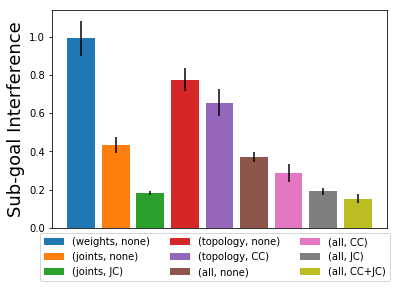

In [32]:
conservatism_data = {}

for bar_x, ( mut, cost ) in enumerate( data_options ):
    conservatism = []
    for data_matrix in position_data[mut][cost]:
        # data_matrix = position_data[mut][cost][0]
        goals = [ ( [0] , ['0', '1'], [4, 5, 6] ), # sub goal 1. uses cylinder at index 0, two variants, uses limbs 4, 5, 6 
                  ( [1] , ['0', '1'], [3, 5, 6] ), # sub goal 2. uses cylinder at index 1, two variants, uses limbs 3, 5, 6
                  ( [2, 3], ['aa', 'ab', 'ba', 'bb'], [0, 1, 2, 6] ) # sub goal 3. uses cylindes 2,3 , two variants, uses limbs 0, 1, 2, 6
                ]
        sub_c = 0
        for goal in goals:
            cyl_indices, variants, limb_indices = goal

            for variant in variants: # get environments which match variant
                environment_indices = []
                for i, env in enumerate( eeall_envs ):
                    test_string = ''
                    for index in cyl_indices:
                        test_string += env[index]


                    if test_string == variant:
                        environment_indices.append( i )
                # print( limb_indices, environment_indices)
                sub_c += sub_conservatism( data_matrix, limb_indices, environment_indices )
        conservatism.append( sub_c )
    conservatism = np.array( conservatism )
    conservatism_data[mut,cost] = conservatism
    sem = scipy.stats.sem( conservatism )
#    plt.boxplot( conservatism )
    plt.bar( bar_x, np.average( conservatism ), yerr = sem,
              label='(' + mut + ', ' + cost_labels[cost] + ')' )
    plt.xticks( [], [] )
    plt.ylabel( 'Sub-goal Interference', fontsize = 18 )
    plt.legend( ncol = 3, bbox_to_anchor = (1.025, 0) )
    plt.savefig( 'img/conservatism-bar-angle.png', dpi = 400, bbox_inches="tight" )

21.018837657027973 2.7278305868445018e-05
none-jc 6.831064661488885e-07
cc-jc 0.07135620227471239
none-cc 0.01951415446433539


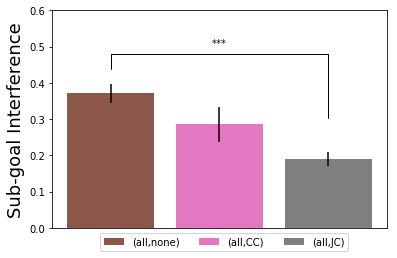

In [102]:
# compare conservatism between (all,none), (all, cc), (all, jc)
plt.bar( 0,
         np.average( conservatism_data[('all','none')] ),
         color = 'C5',
         label = '(all,none)',
         yerr = scipy.stats.sem( conservatism_data[('all','none')] ) ),
plt.bar( 1, np.average( conservatism_data[('all','cc')] ), color = 'C6', label = '(all,CC)',
         yerr = scipy.stats.sem( conservatism_data[('all','cc')] ))
plt.bar( 2, np.average( conservatism_data[('all','jc')] ), color = 'C7', label = '(all,JC)',
         yerr = scipy.stats.sem( conservatism_data[('all','jc')] ))

plt.xticks( [], [] )
plt.legend( ncol = 3, bbox_to_anchor = (0.9, 0) )

# print significance

plt.annotate( '', xy = ( 0, 0.3 ), xytext = ( 2, 0.3 ),
             arrowprops = { 'connectionstyle': 'bar',
                            'arrowstyle' : '-',
                            'shrinkA' : 1, 'shrinkB' : 50 } )
# plt.text( 0.5, 0.93, '***', ha = 'center' )
# plt.annotate( '', xy = ( 3, 0.87 ), xytext = ( 4, 0.87 ),
#              arrowprops = { 'connectionstyle': 'bar',
#                             'arrowstyle' : '-',
#                             'shrinkA' : 10, 'shrinkB' : 10 } )
plt.text( 1, 0.5, '***', ha = 'center' )

statistic, pvalue = scipy.stats.kruskal( conservatism_data[('all','cc')],
                                         conservatism_data[('all','jc')],
                                         conservatism_data[('all','none')])
print( statistic, pvalue )

stat, pvalue = scipy.stats.mannwhitneyu( conservatism_data[('all','none')], conservatism_data[('all','jc')] )
print( 'none-jc', pvalue )
stat, pvalue = scipy.stats.mannwhitneyu( conservatism_data[('all','jc')], conservatism_data[('all','cc')] )
print( 'cc-jc', pvalue )
stat, pvalue = scipy.stats.mannwhitneyu( conservatism_data[('all','none')], conservatism_data[('all','cc')] )
print( 'none-cc', pvalue )
plt.ylim( 0, 0.6 )
plt.ylabel( 'Sub-goal Interference', fontsize = 18 )
plt.savefig( 'img/interference-all-config.png', dpi = 400 )
plt.show()

none-cc 3.446037268793577e-08


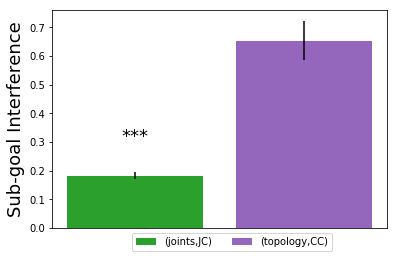

In [104]:

plt.bar( 0,
         np.average( conservatism_data[('joints','jc')] ),
         color = 'C2',
         label = '(joints,JC)',
         yerr = scipy.stats.sem( conservatism_data[('joints','jc')] ) ),
plt.bar( 1, np.average( conservatism_data[('topology','cc')] ), color = 'C4', label = '(topology,CC)',
         yerr = scipy.stats.sem( conservatism_data[('topology','cc')] ))
# plt.bar( 2, np.average( conservatism_data[('all','jc')] ), color = 'C7', label = '(all,jc)',
#          yerr = scipy.stats.sem( conservatism_data[('all','jc')] ))

plt.xticks( [], [] )
plt.legend( ncol = 3, bbox_to_anchor = (0.85, 0) )

plt.text( 0.0, 0.3, '***', fontsize = 18, horizontalalignment = 'center' )

stat, pvalue = scipy.stats.mannwhitneyu( conservatism_data[('joints','jc')], conservatism_data[('topology','cc')] )
print( 'none-cc', pvalue )

plt.ylabel( 'Sub-goal Interference', fontsize = 18 )
plt.savefig( 'img/interference-joints-topology.png', dpi = 400 )
plt.show()